In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create folder if it doesn't exist
os.makedirs("plots", exist_ok=True)

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv',sep=',')
print(df.shape)
print(df.columns)
df.head()

(205, 26)
Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Create 'Brand' column
df['Brand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Correct typos
df['Brand'] = df['Brand'].replace({
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'maxda': 'mazda'
})

# Drop 'CarName' if no longer needed
df.drop(columns='CarName', inplace=True)

In [4]:
df.describe()
df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

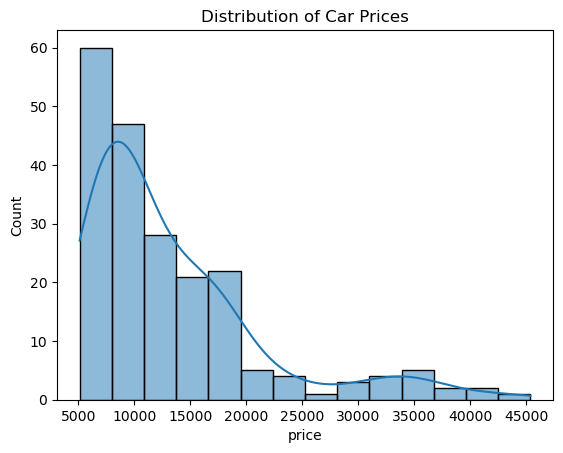

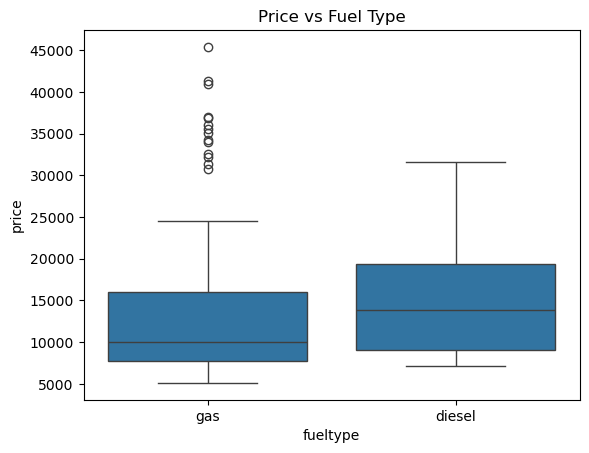

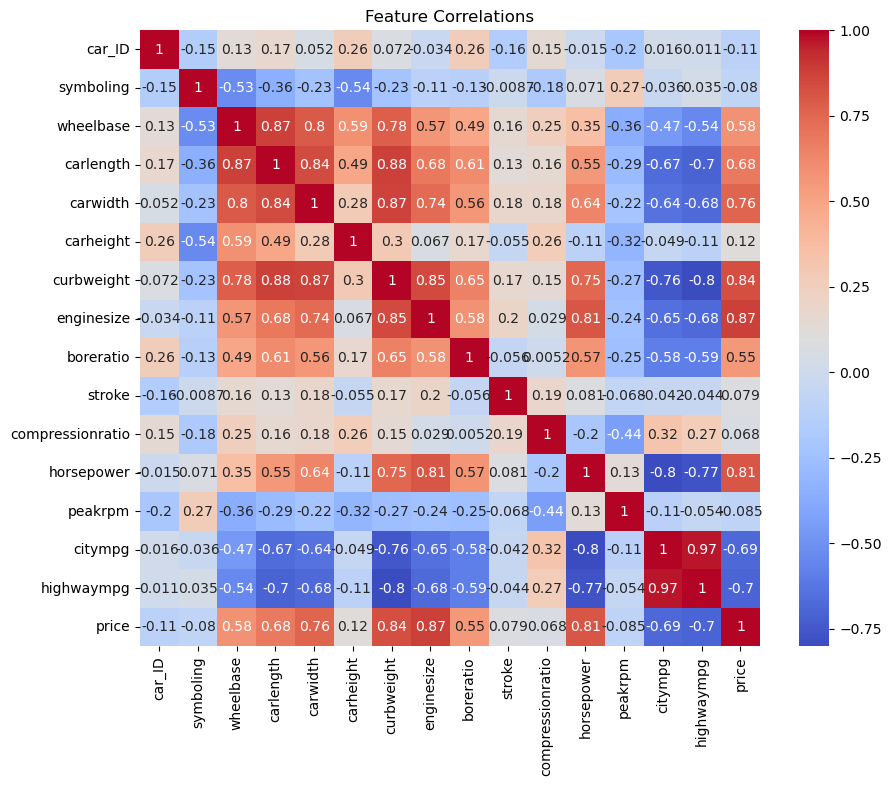

<Figure size 640x480 with 0 Axes>

In [5]:
# Price distribution
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()

# Boxplot: price by fuel type
sns.boxplot(x='fueltype', y='price', data=df)
plt.title('Price vs Fuel Type')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

plt.savefig('plots/price_distribution.png')

In [6]:
df.to_csv('cleaned_car_data.csv', index=False)